**K-means clustering**

* Clustering is an unsupervised machine learning task that automatically divides the data into clusters, or groups of similar items. It does this without having been told how the groups should look ahead of time.

* As we may not even know what we're looking for, clustering is used for knowledge discovery rather than prediction. It provides an insight into the natural groupings found within data.

* There is no need for the algorithm to be trained; data does not need to be labelled ahead of time. The program is simply unleashed on a dataset in the hope that interesting associations are found

* Clustering is guided by the principle that items inside a cluster should be very similar to each other, but very different from those outside.

* k-means is sensitive to the number of clusters; the choice requires a delicate balance. Setting k to be very large will improve the homogeneity of the clusters, and at the same time, it risks overfitting the data.

* As clustering is unsupervised, the task is really about what you make of it; the value is in the insights you take away from the algorithm's findings.

* **Image compression** - While compressing the image using K-Means Clustering we will create clusters of major colours and group all the similar colors in one cluster, forming different clusters for only major colors.




---



**Standard applications:**
* Segmenting customers into groups with similar demographics or buying patterns for targeted marketing campaigns
* Detecting anomalous behavior, such as unauthorized network intrusions, by identifying patterns of use falling outside the known clusters
* Simplifying extremely large datasets by grouping features with similar values into a smaller no of homogeneous categories

**Strengths:**
* Uses simple principles that can be explained in non-statistical terms
* Highly flexible, and can be adapted with simple adjustments to address nearly all of its shortcomings
* Performs well enough under many real-world use cases

**Weaknesses:**
* Not as sophisticated as more modern clustering algorithms
* Because it uses an element of random chance, it is not guaranteed to find the optimal set of clusters
* Requires a reasonable guess as to how many clusters naturally exist in the data
* Not ideal for non-spherical clusters or clusters of widely varying density
* Effective only for continuous data

-----------
* One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids or the mean points. So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it, and at the same time, more than one cluster might end up linked with a single centroid.

* To overcome the above-mentioned drawback we use **K-means++**. This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm.

* An ideal way to figure out the right number of clusters would be to calculate the **Within-Cluster-Sum-of-Squares (WCSS)**. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids

In [1]:
# k-means clustering
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload shopping mall data to colab first
dataset = pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv')

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


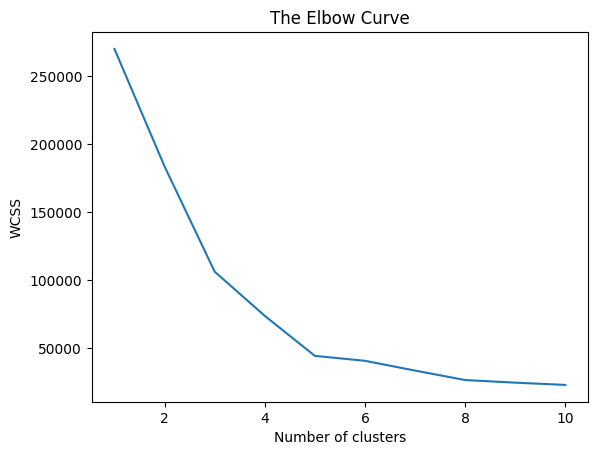

In [4]:
#Considering only 2 features (Annual income and Spending Score)
x = dataset.iloc[:, [3,4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#Let's predict the x
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [8]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [10]:
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

4
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [ ]:
print(x[y_kmeans == 4, 0])
print(x[y_kmeans == 4, 1])

[15 16 17 18 19 19 20 20 21 23 24 25 28 28 29 30 33 33 34 37 38 39 39]
[39  6 40  6  3 14 15 13 35 29 35  5 14 32 31  4  4 14 17 26 35 36 28]


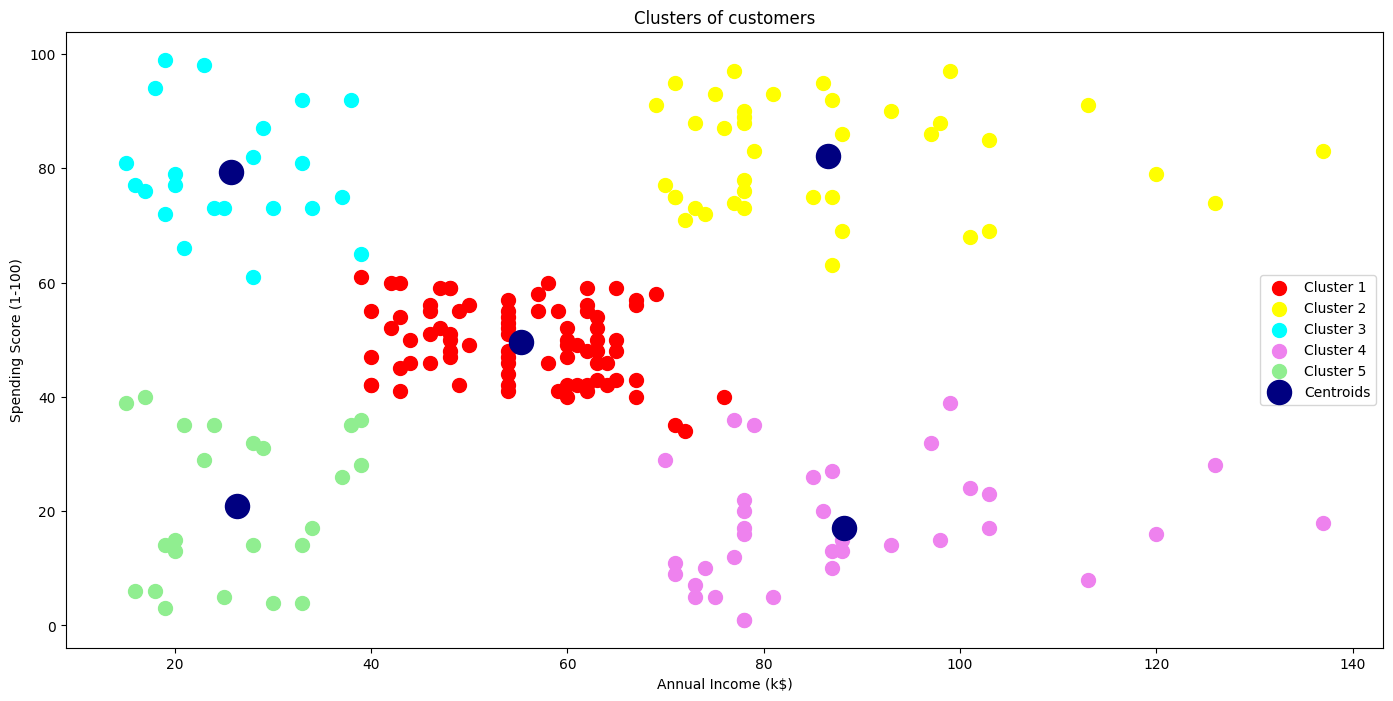

In [ ]:
plt.figure(1 , figsize = (17 , 8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'aqua', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'lightgreen', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'navy', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hierarchical Clustering

Hierarchical clustering is another unsupervised learning algorithm that groups similar data points together. Unlike K-Means, it doesn't require you to specify the number of clusters beforehand. Instead, it builds a hierarchy of clusters.

There are two main types of hierarchical clustering:

1.  **Agglomerative (Bottom-Up):** This is the most common type. It starts with each data point as its own cluster and then iteratively merges the closest clusters until only one cluster (containing all data points) remains.
2.  **Divisive (Top-Down):** This type starts with all data points in a single cluster and then recursively splits the clusters until each data point is in its own cluster.

Key concepts in hierarchical clustering:

*   **Dendrogram:** A tree-like diagram that visualizes the hierarchy of clusters. It shows how clusters are merged or split at different levels of similarity.
*   **Linkage:** The method used to measure the distance between clusters.
    *   **Ward's method:** Minimizes the variance of the clusters being merged.  By focusing on the sum of squares, Ward's method helps create clusters with low internal variance.

Hierarchical clustering is useful for understanding the structure of your data and for creating a hierarchy of clusters that can be explored at different levels of granularity.

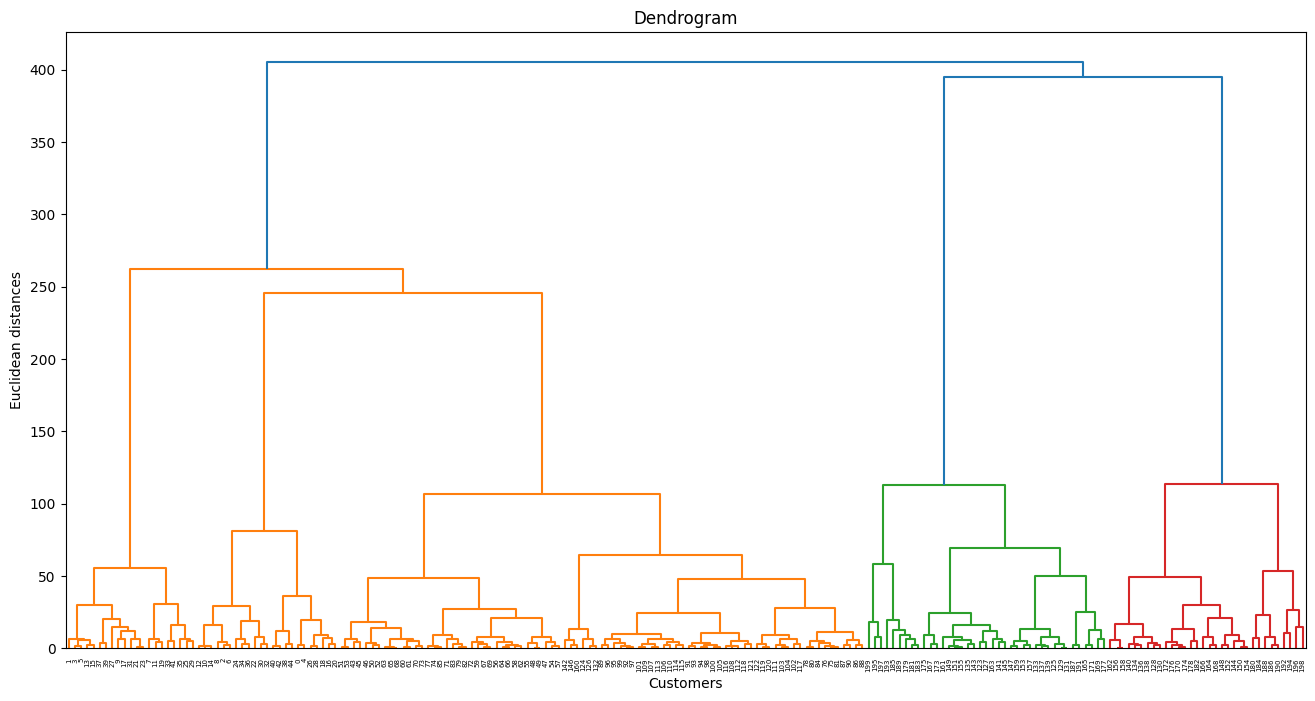

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load the dataset (assuming 'Mall_Customers.csv' is already uploaded)
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values # Using Annual Income and Spending Score

# Create a dendrogram to visualize the clusters
plt.figure(1, figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The dendrogram helps in determining the optimal number of clusters. By drawing a horizontal line across the dendrogram where it intersects the maximum number of vertical lines without crossing any horizontal lines, you can identify the appropriate number of clusters. In this case, it appears that 5 clusters would be a good choice.

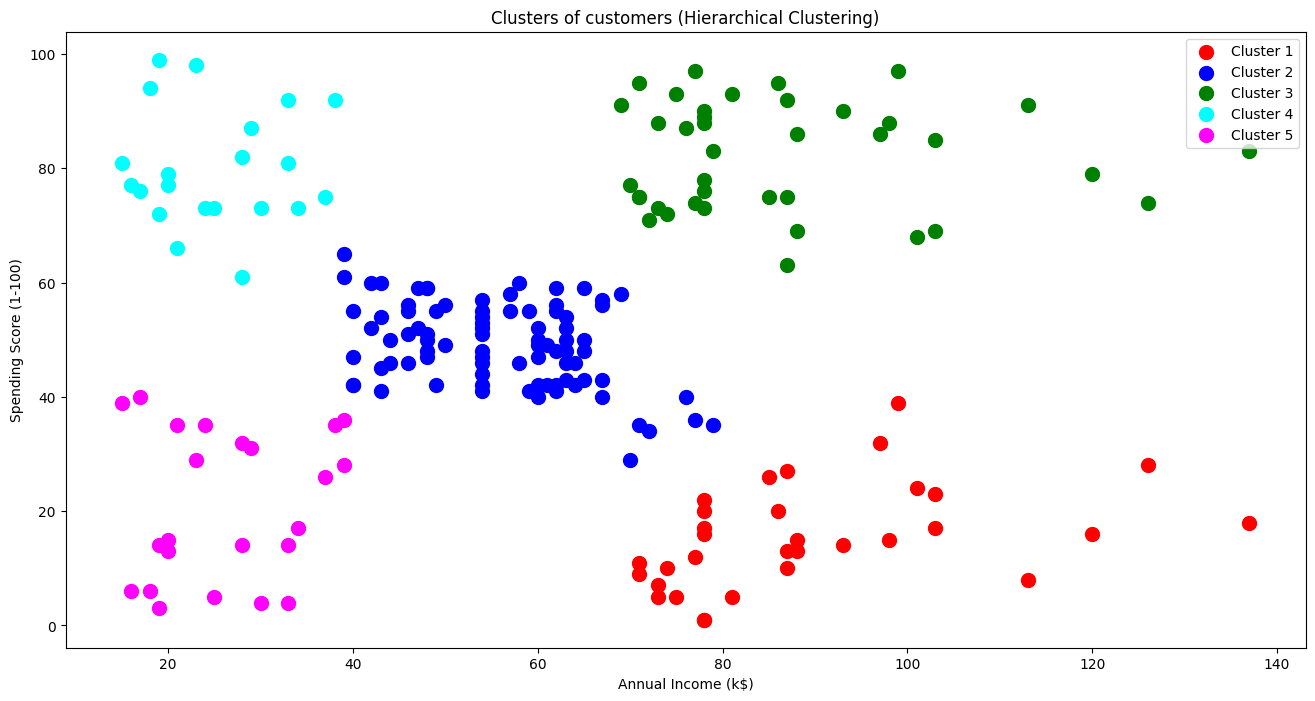

In [ ]:
# Apply Agglomerative Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualize the clusters
plt.figure(1, figsize=(16, 8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()